In [1]:
import pandas as pd 
import seaborn as sns
import numpy as mp

In [2]:
data=pd.read_csv("/Users/mohao/Downloads/ммо/pk1/Latest Covid-19 India Status.csv")

In [3]:
data.head()

,State/UTs,Total Cases,Active,Discharged,Deaths,Active Ratio,Discharge Ratio,Death Ratio,Population
0,Andaman And Nicobar,10032,1,9902,129,0.01,98.70,1.29,100896618
1,Andhra Pradesh,2319504,346,2304428,14730,0.01,99.35,0.64,128500364
2,Arunachal Pradesh,64484,0,64188,296,0.00,99.54,0.46,658019
3,Assam,724196,1358,716199,6639,0.19,98.90,0.92,290492
4,Bihar,830459,32,818171,12256,0.00,98.52,1.48,40100376


In [4]:
data.isnull().sum()

State/UTs          0
Total Cases        0
Active             0
Discharged         0
Deaths             0
Active Ratio       0
Discharge Ratio    0
Death Ratio        0
Population         0
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   State/UTs        36 non-null     object 
 1   Total Cases      36 non-null     int64  
 2   Active           36 non-null     int64  
 3   Discharged       36 non-null     int64  
 4   Deaths           36 non-null     int64  
 5   Active Ratio     36 non-null     float64
 6   Discharge Ratio  36 non-null     float64
 7   Death Ratio      36 non-null     float64
 8   Population       36 non-null     int64  
dtypes: float64(3), int64(5), object(1)
memory usage: 2.7+ KB


In [6]:
#Задача №15.

#Для набора данных проведите нормализацию 
#для одного (произвольного) числового признака с использованием функции "возведение в степень".

In [7]:
from sklearn.feature_selection import SelectKBest
from matplotlib import pyplot as plt
from sklearn.feature_selection import f_regression
import math

In [8]:
max_death=data["Deaths"].max()
for i in range(data.shape[0]):
    data.iloc[i,4]=math.log10(data.iloc[i,4])/math.log10(max_death)
data.head()

,State/UTs,Total Cases,Active,Discharged,Deaths,Active Ratio,Discharge Ratio,Death Ratio,Population
0,Andaman And Nicobar,10032,1,9902,0.408268,0.01,98.70,1.29,100896618
1,Andhra Pradesh,2319504,346,2304428,0.806289,0.01,99.35,0.64,128500364
2,Arunachal Pradesh,64484,0,64188,0.478042,0.00,99.54,0.46,658019
3,Assam,724196,1358,716199,0.739340,0.19,98.90,0.92,290492
4,Bihar,830459,32,818171,0.790842,0.00,98.52,1.48,40100376


In [9]:
#Для студентов группы ИУ5-24М, ИУ5И-24М - 
#для произвольной колонки данных построить график "Скрипичная диаграмма (violin plot)".

<AxesSubplot:xlabel='Total Cases'>

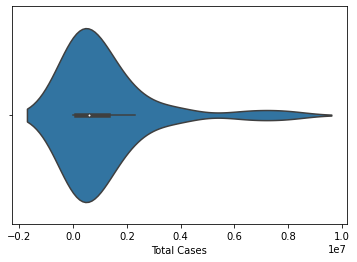

In [10]:
sns.violinplot(x=data["Total Cases"])

<AxesSubplot:xlabel='Deaths'>

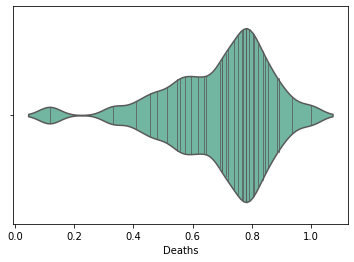

In [11]:
sns.violinplot(x=data["Deaths"], palette="Set2", split=True,
               scale="count", inner="stick",
               scale_hue=False, bw=.2)

In [12]:
#Для набора данных проведите процедуру отбора признаков (feature selection). 
#Используйте метод вложений (embedded method). Используйте подход на основе дерева решений

In [ ]:
#Выберите данные для обработки

In [13]:
y=data['Total Cases']
x=data.drop(['Total Cases','State/UTs'],axis=1)

In [ ]:
#Установите порог для выбора модели на 0,145

In [14]:
from sklearn import datasets
from sklearn import metrics
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
model = ExtraTreesClassifier()
new_model = SelectFromModel(model,threshold=0.145)
x_new=new_model.fit_transform(x, y)
print(x_new.shape)
print(new_model.get_support(indices=True))

(36, 3)
[2 5 6]


<AxesSubplot:>

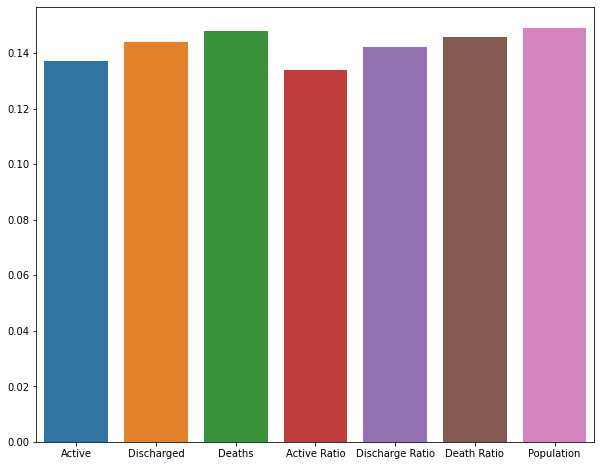

In [15]:
plt.figure(figsize=(10,8))
sns.barplot(x=x.columns.values,y=ExtraTreesClassifier().fit(x,y).feature_importances_)

In [ ]:
#Выбранные признаки являются вторым (DEATH), пятым (DEATH RATIO) и шестым (POPULATION) в массиве.